In [77]:
import pandas as pd
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from scipy.cluster import hierarchy as sch 
import matplotlib.pyplot as plt
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

# IMPORTING DATASET

In [2]:
crime_data=pd.read_csv('crime_data.csv')

In [3]:
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# DATA UNDERSTANDING

In [4]:
crime_data.shape

(50, 5)

In [5]:
crime_data.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [6]:
crime_data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

# DATA PREPARINING

In [10]:
crime_data.rename(columns={'Unnamed: 0':'country'},inplace=True)

In [11]:
crime_data

,country,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [12]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [14]:
crime_norm=norm_func(crime_data.iloc[:,1:])

In [15]:
crime_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


# Hierarchical Clustering

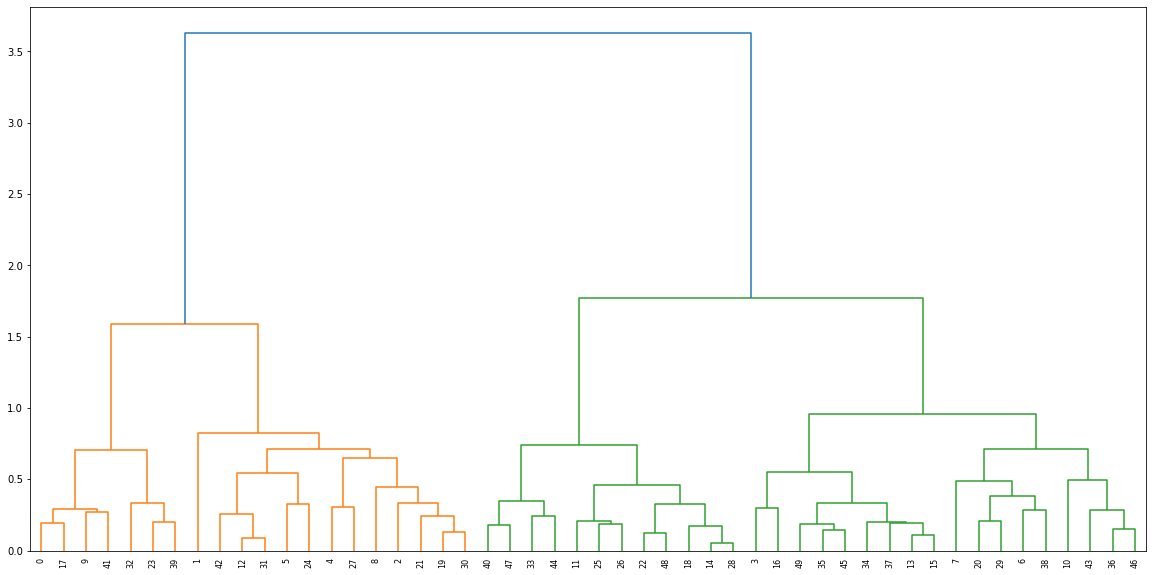

In [34]:
plt.figure(figsize=(20,10))
dendogram=sch.dendrogram(sch.linkage(crime_norm,method='ward'))
plt.show()

In [65]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward')

In [66]:
hirar_cluster=hc.fit_predict(crime_norm)

In [67]:
hirar_cluster

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1], dtype=int64)

In [68]:
crime_data['hc_cluster']=hirar_cluster

In [69]:
crime_data

,country,Murder,Assault,UrbanPop,Rape,hc_cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


### Here 0 denotes Highest Crime Rate follow by 1st cluster and then 2nd cluster 

In [70]:
crime_data[crime_data['hc_cluster']==0]

,country,Murder,Assault,UrbanPop,Rape,hc_cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0
12,Illinois,10.4,249,83,24.0,0
17,Louisiana,15.4,249,66,22.2,0
19,Maryland,11.3,300,67,27.8,0


In [71]:
crime_data[crime_data['hc_cluster']==1]

,country,Murder,Assault,UrbanPop,Rape,hc_cluster
3,Arkansas,8.8,190,50,19.5,1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
10,Hawaii,5.3,46,83,20.2,1
13,Indiana,7.2,113,65,21.0,1
15,Kansas,6.0,115,66,18.0,1
16,Kentucky,9.7,109,52,16.3,1
20,Massachusetts,4.4,149,85,16.3,1
29,New Jersey,7.4,159,89,18.8,1
34,Ohio,7.3,120,75,21.4,1


In [72]:
crime_data[crime_data['hc_cluster']==2]

,country,Murder,Assault,UrbanPop,Rape,hc_cluster
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
18,Maine,2.1,83,51,7.8,2
22,Minnesota,2.7,72,66,14.9,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2
44,Vermont,2.2,48,32,11.2,2


In [75]:
crime_data.groupby('hc_cluster').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
hc_cluster,,,,
0,12.165000,255.250000,68.400000,29.165000
1,6.055556,140.055556,71.333333,18.683333
2,3.091667,76.000000,52.083333,11.833333


# KMEANS Clustering

#### BEFORE KMEANS WE CAN DO CLUSTER VALIDATION TECHNIQUE TO FIND OPTIMAL NUMBER OF CLUSTER FOR OUR KMEANS MODEL

#### 1 WCSS METHOD
The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [76]:
from yellowbrick.cluster import KElbowVisualizer

In [78]:
km=KMeans()

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=10))

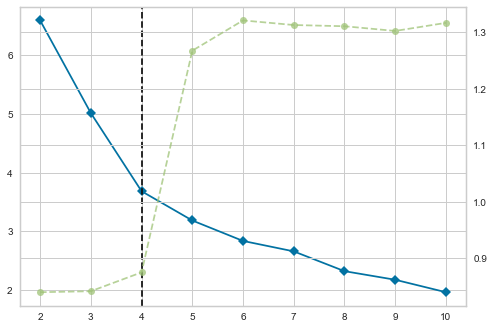

In [79]:
visualizer1=KElbowVisualizer(km)
visualizer1.fit(crime_norm)

#### Manually process below

In [80]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state=12)
    km.fit_predict(crime_norm)
    wcss.append(km.inertia_)

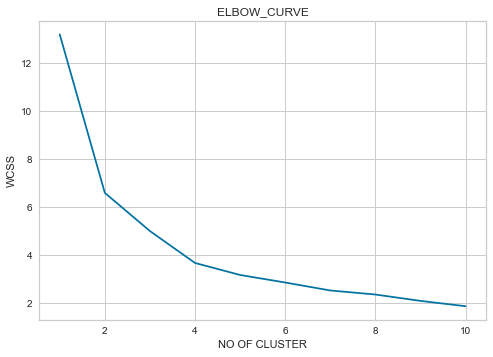

In [81]:
plt.plot(range(1,11),wcss)
plt.title('ELBOW_CURVE')
plt.xlabel('NO OF CLUSTER')
plt.ylabel('WCSS')
plt.show()


# 2. SILLHOUTTE SCORE

In [82]:
from yellowbrick.cluster import SilhouetteVisualizer

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=3))

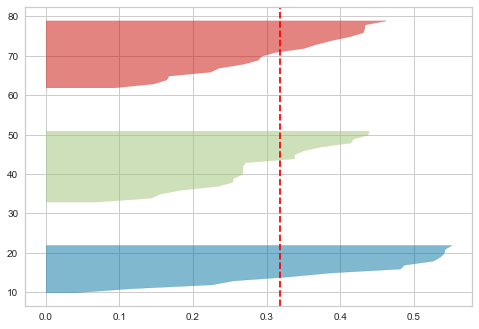

In [86]:
km2=KMeans(n_clusters=3)
visualizer2=SilhouetteVisualizer(km2,colors='yellowbrick')
visualizer2.fit(crime_norm)

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=4))

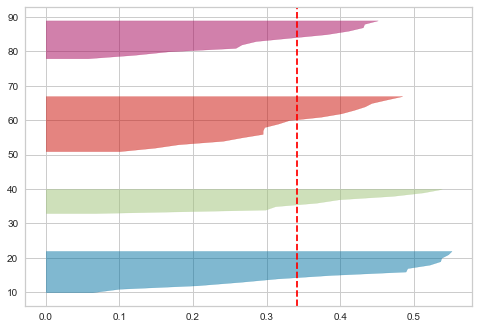

In [87]:
km3=KMeans(n_clusters=4)
visualizer2=SilhouetteVisualizer(km3,colors='yellowbrick')
visualizer2.fit(crime_norm)

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=5))

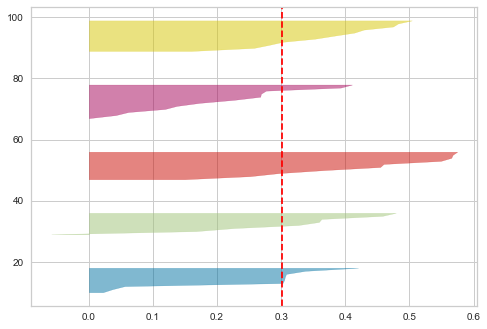

In [88]:
km3=KMeans(n_clusters=5)
visualizer2=SilhouetteVisualizer(km3,colors='yellowbrick')
visualizer2.fit(crime_norm)

# 3. CALINSKI_HARABAZ_SCORE

KElbowVisualizer(ax=<AxesSubplot:>,
                 estimator=KMeans(n_clusters=10, random_state=12),
                 metric='calinski_harabasz')

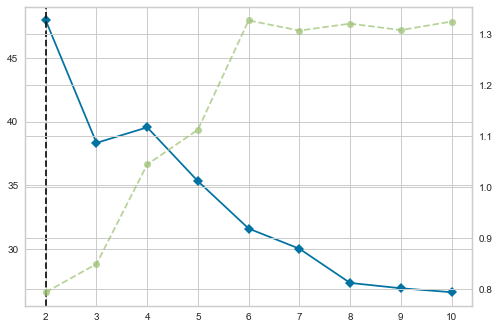

In [119]:
visualizer5=KElbowVisualizer(km,metric='calinski_harabasz')
visualizer5.fit(crime_norm)

#### Manully process below

In [90]:
from sklearn.metrics import calinski_harabasz_score as chs

In [91]:
iner1=[]
for i in range(2,11):
    k3=KMeans(n_clusters=i)
    ypred1=k3.fit_predict(crime_norm)
    iner1.append(chs(crime_norm,ypred1))

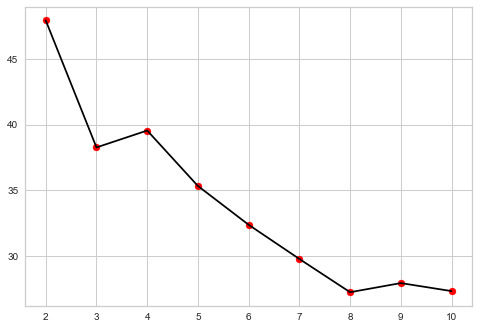

In [93]:
plt.plot(range(2,11),iner1,color='black')
plt.scatter(range(2,11),iner1,color='red')
plt.show()


# WE CAN SAY THAT AFTER FINDINGS MAYBE OPTIMAL NUMBER OF CLUSTER IS 4 OR 3

In [113]:
kmeans=KMeans(n_clusters=4,random_state=12)

In [114]:
kmeans_cluster=kmeans.fit_predict(crime_norm)
kmeans_cluster

array([2, 3, 3, 2, 3, 3, 0, 0, 3, 2, 0, 1, 3, 0, 1, 0, 1, 2, 1, 3, 0, 3,
       1, 2, 0, 1, 1, 3, 1, 0, 3, 3, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 3, 0,
       1, 0, 0, 1, 1, 0])

In [115]:
crime_data['kmeans_cluster']=kmeans_cluster

In [116]:
crime_data

,country,Murder,Assault,UrbanPop,Rape,hc_cluster,kmeans_cluster
0,Alabama,13.2,236,58,21.2,0,2
1,Alaska,10.0,263,48,44.5,0,3
2,Arizona,8.1,294,80,31.0,0,3
3,Arkansas,8.8,190,50,19.5,1,2
4,California,9.0,276,91,40.6,0,3
5,Colorado,7.9,204,78,38.7,0,3
6,Connecticut,3.3,110,77,11.1,1,0
7,Delaware,5.9,238,72,15.8,1,0
8,Florida,15.4,335,80,31.9,0,3
9,Georgia,17.4,211,60,25.8,0,2


In [117]:
crime_data.groupby('kmeans_cluster').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,hc_cluster
,mean,mean,mean,mean,mean
kmeans_cluster,,,,,
0,5.852941,141.176471,73.647059,19.335294,0.941176
1,3.600000,78.538462,52.076923,12.176923,1.923077
2,13.937500,243.625000,53.750000,21.412500,0.125000
3,10.966667,264.000000,76.500000,33.608333,0.000000


### WE CAN SAY THAT 1 CLUSTER IS THE LOWEST CRIME RATE FOLLOW BY 0 CLUSTER FOLLOW BY 2 AND HIGHEST CRIME RATE IS 3 CLUSTER

# ===========================================================

# 3 DBSCAN

# ITS GOOD IF WE REDUCED THE COLOUMN SO WE CAN GET BETTER RESULT IN DBSCAN

In [130]:
from sklearn.manifold import TSNE

In [132]:
tsne=TSNE(n_components=2,perplexity=10.0)

In [133]:
x_tsne=tsne.fit_transform(crime_norm)

In [134]:
x_tsne=pd.DataFrame(x_tsne,columns={'ts1','ts2'})

In [135]:
x_tsne

,ts1,ts2
0,4.233200,-10.941244
1,14.228246,-1.022209
2,11.662685,-4.712331
3,-6.382642,-3.141714
4,14.253254,-4.472794
5,15.522276,-6.461947
6,-6.714904,9.112057
7,-1.997515,-1.571659
8,12.182726,-9.649506
9,4.828699,-8.820497


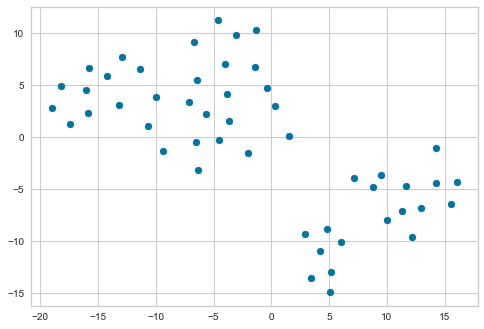

In [139]:
plt.scatter(x=x_tsne['ts1'],y=x_tsne['ts2'])

In [179]:
db=DBSCAN(eps=4,min_samples=3,metric='euclidean',)

In [180]:
db_cluster=db.fit_predict(x_tsne)
db_cluster

array([0, 1, 1, 2, 1, 1, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 1,
       2, 0, 2, 2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

In [181]:
crime_data['db_cluster']=db_cluster

In [182]:
crime_data

,country,Murder,Assault,UrbanPop,Rape,hc_cluster,kmeans_cluster,db_cluster
0,Alabama,13.2,236,58,21.2,0,2,0
1,Alaska,10.0,263,48,44.5,0,3,1
2,Arizona,8.1,294,80,31.0,0,3,1
3,Arkansas,8.8,190,50,19.5,1,2,2
4,California,9.0,276,91,40.6,0,3,1
5,Colorado,7.9,204,78,38.7,0,3,1
6,Connecticut,3.3,110,77,11.1,1,0,2
7,Delaware,5.9,238,72,15.8,1,0,2
8,Florida,15.4,335,80,31.9,0,3,1
9,Georgia,17.4,211,60,25.8,0,2,0


In [183]:
crime_data.groupby('db_cluster').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,hc_cluster,kmeans_cluster
,mean,mean,mean,mean,mean,mean
db_cluster,,,,,,
0,14.671429,251.285714,54.285714,21.685714,0.000000,2.000000
1,10.966667,264.000000,76.500000,33.608333,0.000000,3.000000
2,5.003226,116.483871,63.838710,16.338710,1.354839,0.483871


### HIGHER CRIME RATE IN 1 CLUSTER FOLLOW BY 0 AND LEAST CRIME RATE IN 1

In [184]:
crime_data[crime_data['db_cluster']==1]

,country,Murder,Assault,UrbanPop,Rape,hc_cluster,kmeans_cluster,db_cluster
1,Alaska,10.0,263,48,44.5,0,3,1
2,Arizona,8.1,294,80,31.0,0,3,1
4,California,9.0,276,91,40.6,0,3,1
5,Colorado,7.9,204,78,38.7,0,3,1
8,Florida,15.4,335,80,31.9,0,3,1
12,Illinois,10.4,249,83,24.0,0,3,1
19,Maryland,11.3,300,67,27.8,0,3,1
21,Michigan,12.1,255,74,35.1,0,3,1
27,Nevada,12.2,252,81,46.0,0,3,1
30,New Mexico,11.4,285,70,32.1,0,3,1


# ============================================================

# CONCLUSION :
## WE GET ALMOST SAME RESULT AFTER WE TWEAK SOME PARAMETER IN EVERY MODEL    